In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
start_date = '1972-1-6'
end_date = '2019-12-5'
pred_end_date = '2020-12-5'

In [0]:
Ford =  pd.read_csv('gdrive/My Drive/F.csv')

In [0]:
print(Ford)

             Date      Open      High       Low     Close  Adj Close    Volume
0      1972-06-01  2.149165  2.173495  2.149165  2.153220   0.282115   1089200
1      1972-06-02  2.153220  2.173495  2.141055  2.149165   0.281584   1173500
2      1972-06-05  2.149165  2.169440  2.141055  2.149165   0.281584   5208100
3      1972-06-06  2.149165  2.157275  2.116725  2.124835   0.278396   1421400
4      1972-06-07  2.124835  2.137000  2.112669  2.112669   0.276802    671800
...           ...       ...       ...       ...       ...        ...       ...
11979  2019-11-29  9.040000  9.100000  9.030000  9.060000   9.060000  13096200
11980  2019-12-02  9.080000  9.140000  9.000000  9.010000   9.010000  37232700
11981  2019-12-03  8.950000  8.950000  8.800000  8.890000   8.890000  40653100
11982  2019-12-04  8.950000  9.030000  8.940000  8.950000   8.950000  29982900
11983  2019-12-05  8.970000  9.000000  8.880000  8.930000   8.930000  23822910

[11984 rows x 7 columns]


In [0]:
Ford['Date'] = pd.to_datetime(Ford['Date'])
print(Ford)

            Date      Open      High       Low     Close  Adj Close    Volume
0     1972-06-01  2.149165  2.173495  2.149165  2.153220   0.282115   1089200
1     1972-06-02  2.153220  2.173495  2.141055  2.149165   0.281584   1173500
2     1972-06-05  2.149165  2.169440  2.141055  2.149165   0.281584   5208100
3     1972-06-06  2.149165  2.157275  2.116725  2.124835   0.278396   1421400
4     1972-06-07  2.124835  2.137000  2.112669  2.112669   0.276802    671800
...          ...       ...       ...       ...       ...        ...       ...
11979 2019-11-29  9.040000  9.100000  9.030000  9.060000   9.060000  13096200
11980 2019-12-02  9.080000  9.140000  9.000000  9.010000   9.010000  37232700
11981 2019-12-03  8.950000  8.950000  8.800000  8.890000   8.890000  40653100
11982 2019-12-04  8.950000  9.030000  8.940000  8.950000   8.950000  29982900
11983 2019-12-05  8.970000  9.000000  8.880000  8.930000   8.930000  23822910

[11984 rows x 7 columns]


In [0]:
print(Ford.head())
print(Ford.tail())

        Date      Open      High       Low     Close  Adj Close   Volume
0 1972-06-01  2.149165  2.173495  2.149165  2.153220   0.282115  1089200
1 1972-06-02  2.153220  2.173495  2.141055  2.149165   0.281584  1173500
2 1972-06-05  2.149165  2.169440  2.141055  2.149165   0.281584  5208100
3 1972-06-06  2.149165  2.157275  2.116725  2.124835   0.278396  1421400
4 1972-06-07  2.124835  2.137000  2.112669  2.112669   0.276802   671800
            Date  Open  High   Low  Close  Adj Close    Volume
11979 2019-11-29  9.04  9.10  9.03   9.06       9.06  13096200
11980 2019-12-02  9.08  9.14  9.00   9.01       9.01  37232700
11981 2019-12-03  8.95  8.95  8.80   8.89       8.89  40653100
11982 2019-12-04  8.95  9.03  8.94   8.95       8.95  29982900
11983 2019-12-05  8.97  9.00  8.88   8.93       8.93  23822910


In [0]:
returns = (Ford.loc[1:, 'Adj Close'] - \
 Ford.shift(1).loc[1:, 'Adj Close']) / \
 Ford.shift(1).loc[1:, 'Adj Close']
print(returns.tolist())

[-0.001882211155025446, 0.0, -0.011321666003750298, -0.005725656977830085, -0.0076769676519677895, -0.005803179734742932, 0.0, 0.007781516974692632, 0.015446498648295125, -0.003803778013948508, 0.003818301987097646, -0.005703877849702404, 0.0038219998920337277, -0.009522204734572099, -0.005769697145194336, -0.001933179698336605, -0.003877495932824045, 0.007781516974692632, -0.0019294497252986965, -0.00386635939667321, -0.007770041847121016, -0.00391176069748685, -0.005894381847966307, 0.011858663184951343, -0.003907786531187063, -0.01176566109876796, -0.0059528700003733965, -0.007983439528732823, 0.0, -0.0020109751525275764, 0.0, 0.01007893139040698, 0.0059885188747294425, -0.01388878515143583, 0.014084400362051164, 0.027777570302871868, 0.006634981541234246, -0.003876780467379525, -0.003888244673141001, 0.009764012121344479, 0.0, 0.0, 0.013538878341037008, 0.017175620003625658, 0.003753131978152227, 0.0018695493237243167, -0.0037321212626661524, -0.014980920690064086, 0.00190153787318

In [0]:
So = Ford.loc[Ford.shape[0] - 1, "Adj Close"]
print(So)

8.93


In [0]:
dt = 1 # day # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date,
 format = "%Y-%m-%d") + pd.Timedelta('1 days'),
 end = pd.to_datetime(pred_end_date,
 format = "%Y-%m-%d")).to_series().map(lambda x:
 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}


In [0]:
# Calculating drift and diffusion components drift = (mu - 0.5 * sigma**2) * t
drift = (mu - 0.5 * sigma**2) * t
print(drift)

[0.00028741 0.00057481 0.00086222 0.00114962 0.00143703 0.00172443
 0.00201184 0.00229924 0.00258665 0.00287405 0.00316146 0.00344886
 0.00373627 0.00402367 0.00431108 0.00459848 0.00488589 0.00517329
 0.0054607  0.0057481  0.00603551 0.00632291 0.00661032 0.00689773
 0.00718513 0.00747254 0.00775994 0.00804735 0.00833475 0.00862216
 0.00890956 0.00919697 0.00948437 0.00977178 0.01005918 0.01034659
 0.01063399 0.0109214  0.0112088  0.01149621 0.01178361 0.01207102
 0.01235842 0.01264583 0.01293323 0.01322064 0.01350805 0.01379545
 0.01408286 0.01437026 0.01465767 0.01494507 0.01523248 0.01551988
 0.01580729 0.01609469 0.0163821  0.0166695  0.01695691 0.01724431
 0.01753172 0.01781912 0.01810653 0.01839393 0.01868134 0.01896874
 0.01925615 0.01954355 0.01983096 0.02011837 0.02040577 0.02069318
 0.02098058 0.02126799 0.02155539 0.0218428  0.0221302  0.02241761
 0.02270501 0.02299242 0.02327982 0.02356723 0.02385463 0.02414204
 0.02442944 0.02471685 0.02500425 0.02529166 0.02557906 0.0258

In [0]:
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

{'1': array([-0.00357889, -0.02449811, -0.03120403, -0.0149331 , -0.02765113,
        0.00422227,  0.00741115,  0.0497528 ,  0.04872613,  0.04957383,
        0.07039996,  0.04852533,  0.04200603,  0.08159802,  0.06581208,
        0.05812462,  0.05702859,  0.06966183,  0.07449322,  0.06888754,
        0.06758622,  0.04132732,  0.07451018,  0.07094071,  0.08807156,
        0.08127784,  0.07478245,  0.07208688,  0.0692358 ,  0.04975314,
        0.06307351,  0.07796551,  0.06675527,  0.05460429,  0.0529604 ,
        0.00349069,  0.05001719,  0.05050576,  0.06367636,  0.04556427,
        0.06077273,  0.0835312 ,  0.08722435,  0.07422154,  0.10803732,
        0.13159285,  0.16433969,  0.16868349,  0.19287488,  0.22993302,
        0.22210914,  0.19036888,  0.19304056,  0.17626212,  0.23238221,
        0.26318173,  0.25472142,  0.23502694,  0.25227061,  0.25779519,
        0.20504751,  0.25294025,  0.2244133 ,  0.20250143,  0.1846554 ,
        0.18899708,  0.18375207,  0.20619155,  0.19799571,

In [0]:
# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)])
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S)

[[ 8.93        8.9006554   8.71890009 ... 19.1173762  18.60982631
  17.50848459]
 [ 8.93        8.8824435   9.06768597 ... 13.38572488 12.82084539
  12.63702654]
 [ 8.93        8.89476291  8.64525627 ...  7.88513737  7.60844465
   7.45003282]
 ...
 [ 8.93        8.70293331  8.44969989 ...  9.90641029 10.09656666
  10.25918538]
 [ 8.93        8.97264165  9.01360167 ...  8.36084237  8.25166329
   7.92742684]
 [ 8.93        8.91692489  8.99817738 ... 15.84691393 15.71460482
  15.70384472]]


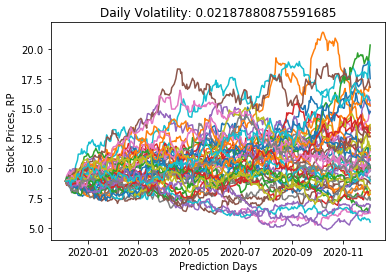

In [0]:
# Plotting the simulations plt.figure(figsize = (20,10))
for i in range(scen_size):
 plt.title("Daily Volatility: " + str(sigma))
 plt.plot(pd.date_range(start = Ford["Date"].max(),
 end = pred_end_date, freq = 'D').map(lambda x:
 x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
 plt.ylabel('Stock Prices, RP')
 plt.xlabel('Prediction Days')
plt.show()